# <font color="#fc033d" size = 30px>WEEK 14 - Activity - Group 6</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
x = df.iloc[:,1:10]
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


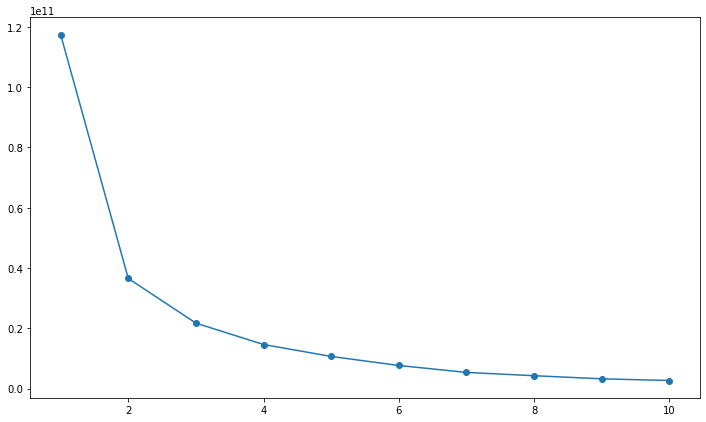

In [10]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize=(12,7))
plt.plot(range(1,11),wcss,'o-')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2,init = 'k-means++', random_state=42)
kmeans.fit(x)
labels = kmeans.predict(x)
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(x, labels, metric='euclidean')
print('Silhouette Score = %.5f' % sil_score)

Silhouette Score = 0.72563


In [13]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

x_pca.shape

(167, 2)

In [17]:
#From 9 columns we came down to 2 columns

In [18]:
type(x_pca)

numpy.ndarray

In [26]:
newDF = pd.DataFrame(x_pca,columns=['C1','C2'])
newDF

,C1,C2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151
...,...,...
162,-17180.967679,-2487.153835
163,-100.445973,-832.252802
164,-17202.017189,-222.889872
165,-17209.340213,-229.815901


In [27]:
newDF['Cluster'] = labels

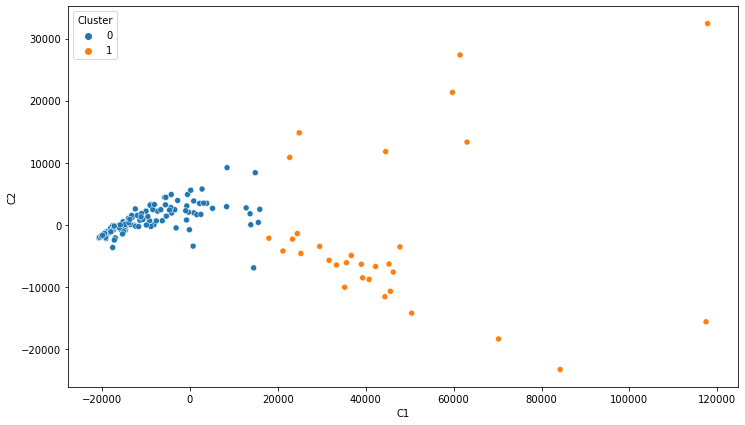

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=newDF['C1'],y=newDF['C2'],hue=newDF['Cluster'])
plt.show()

In [29]:
df['KMeans'] = labels

In [31]:
df[df.KMeans == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [32]:
df[df.KMeans == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1


In [33]:
# From the above table it is evident that countries with low income belongs to cluster 0 
# So Aid should be given to countries in falling in cluster 0

In [36]:
country = np.array(df.country[df.KMeans == 0])
country

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'L

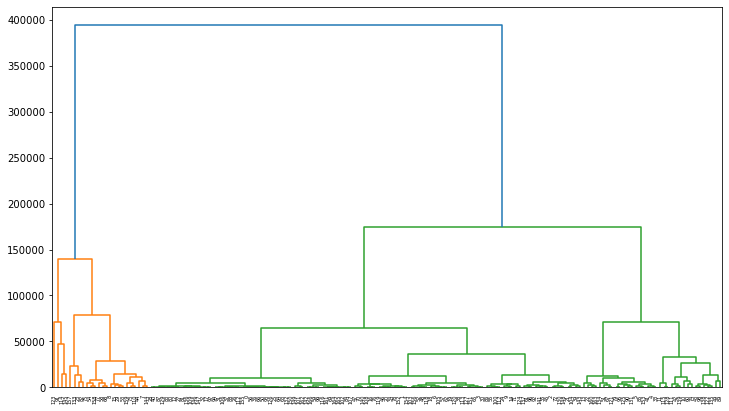

In [39]:
# Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(x,method="ward")
plt.figure(figsize=(12,7))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

In [40]:
# From the above dendrogram its clear that we should choose number of clusters as 2

In [42]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_ac=ac.fit_predict(x)
labels_ac

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
sil_score = silhouette_score(x, labels_ac, metric='euclidean')
print('Silhouette Score = %.5f' % sil_score)

Silhouette Score = 0.72282


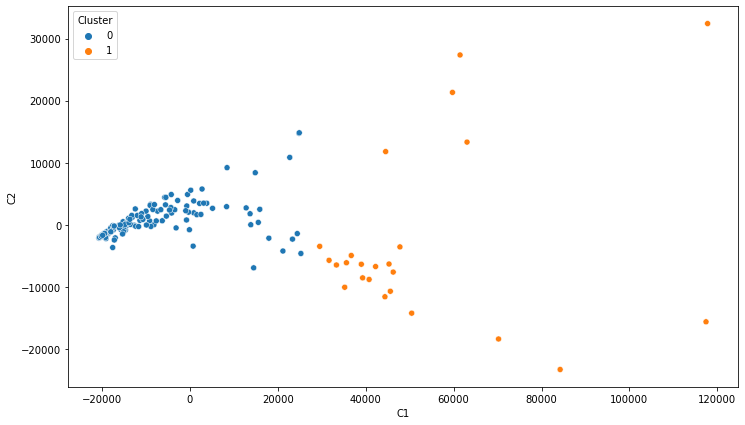

In [46]:
pca = PCA(n_components = 2)
newDF = pd.DataFrame(pca.fit_transform(x), columns=["C1","C2"])
newDF['Cluster'] = labels_ac
plt.figure(figsize=(12,7))
sns.scatterplot(x=newDF['C1'],y=newDF['C2'],hue=newDF['Cluster'])
plt.show()

In [47]:
df['Agglomerative'] = labels_ac

In [48]:
df[df.Agglomerative ==  0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,Agglomerative
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [49]:
df[df.Agglomerative == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,Agglomerative
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1,1


In [50]:
# From the above tables it is evident that countries falling in cluster 0 are not developed and they have low income

# The cluster 0 countries need aid

In [51]:
country = np.array(df.country[df.Agglomerative == 0])
country

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Le

In [52]:
# When we compare the Silhouette Score of KMeans and Agglomerative Clustering KMeans has high Silhouette Score

# We can opt KMeans model